Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Cascha van Wanrooij, 2014934"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 21st, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 21, 2018".



## Generating and plotting data

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [0.5 point] Explain in words what the following code does. 

In [3]:
n_observations = 100
x = np.random.uniform(0,2,size=n_observations)
df = pd.DataFrame({'x': x})

In [4]:
df.head()

,x
0,0.054836
1,0.284875
2,0.878430
3,0.305180
4,1.503294


***
* ***np.random.uniform(0,2,size=n_observations)*** creates a variable ***x*** whos observations are randomly distributed between 0 and 2 (including 0 but exlcuding 2) with 100 observations (because ***n_observations = 100***). 


* ***df = pd.DataFrame({'x': x})*** creates a dataframe with column called ***x*** that corresponds to the x variable
***

Now we are going to add some columns to the dataframe `df`.

#### b) [0.5 points] Add two columns to the data frame: (i) column `y` where $y=3*x+5$ and (ii) column `z` where $z = (x-1)^2$.

In [5]:
df['y'] = 3*x+5
df['z'] = (x-1)**2
df.head()

,x,y,z
0,0.054836,5.164507,0.893336
1,0.284875,5.854624,0.511404
2,0.878430,7.635290,0.014779
3,0.305180,5.915539,0.482775
4,1.503294,9.509882,0.253305


##### Explaination
***
To add new columns to the dataframe I use ***df['y'] = 3*x+5*** and ***df['z'] = (x-1)***\*\****2*** for *y* and *z* respectively. I then use df.head() to inspect the modified dataframe.
***

#### c) [0.5 point] Calculate the means and standard deviations for `x` and `y`. 

[hint: you can do this with one command or with four separate commands]

In [6]:
df.describe()

,x,y,z
count,100.000000,100.000000,1.000000e+02
mean,0.964831,7.894492,2.819542e-01
std,0.532497,1.597490,2.774884e-01
min,0.011645,5.034935,6.731463e-08
25%,0.541028,6.623083,5.212163e-02
50%,0.987752,7.963257,1.775462e-01
75%,1.411424,9.234273,4.550110e-01
max,1.935539,10.806618,9.768457e-01


I use ***df.describe()*** to get some basic stastic info for all columns, as you can see from the table created: 

* Mean for x = 1.000166, standard deviation for x = 0.577687
* Mean for y = 8.000497, standard deviation for y = 1.733061

#### d) [0.5 points] Use your knowledge of statistics to explain the relations (i) between the means of `x` and `y` and (ii) between the standard deviations of `x` and `y`.

***
*y* is a linear transformation of *x*  so y =a\*x + b, with y=3\*x + 5 therefore:

* The mean of *y* = 3\*(mean *x*)+5, this checks out because: 3\*1.000166 + 5 = 8.000497


* The standard deviation of *y* = x\*|3|, this checks out because: 0.577687\*3=1.733061
***

#### e) [1 point] Plot a histogram of `x` with fractions (not absolute numbers) on the vertical axis. Add the label $x$ to the horizontal axis.

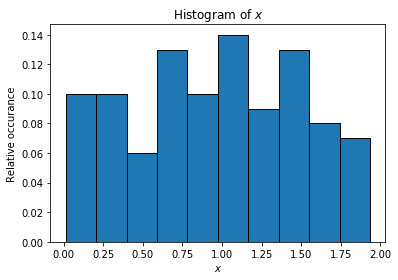

In [7]:
weights = np.ones_like(df['x'])/float(len(df['x']))
plt.hist(df['x'], bins=10,weights=weights,edgecolor='black')
plt.xlabel('$x$')
plt.ylabel('Relative occurance')
plt.title("Histogram of $x$")
plt.show()

##### Explaination
***
First we use ***weights = np.ones_like(df['x'])/float(len(df['x']))*** to unify the width of all bins so that the total fractions of the bins add up to one. We use ***plt.hist(df['x'], bins=10,weights=weights,edgecolor='black')*** to make a histogram of the *x* column of df, using 10 bins because I think that's a reasonable number for this dataset and using ****weights*** specified earlier as weights, for readability we add black edge to the bins. Then we use ***plt.xlabel('$x$')*** to add the label *x* to the x-axis. We even add a label to the y-axis using ***plt.ylabel('Relative occurance')*** so the histogram wont be interpreted wrongly. Finally, we use plt.title("Histogram of $x$") to add a title.
***

#### f) [0.5 points] Make a scatter plot of `y` vs `z` with the label $y$ on the horizontal axis and the label $z$ on the vertical axis.

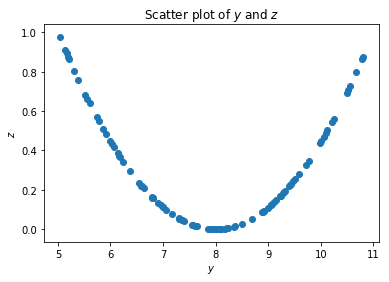

In [8]:
plt.scatter(df['y'],df['z'])
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.title("Scatter plot of $y$ and $z$")
plt.show()

##### Explaination
***
We use ***plt.scatter(df['y'],df['z'])*** to create a scatter plot, specifying the *y* column of df1 for the horizontal axis and the *z* column of df for the vertical axis using ***plt.xlabel('\$y\$')*** and ***plt.ylabel('\$z\$')*** respecively. Finally, we use plt.title("Scatter plot of $y$ and $z$") to add a title.

The relationship between y and z goes up and down because y is a linear transformation of x, and z is a quadratic form of x, so for x between 0 and 2 there's always two answers except when z=0
***

This relation looks rather "perfect". We want to make a "noisy" version of this graph.

#### g) [0.5 points] Create a variable `z2` equal to `z` but with some "noise" added to it. That is, add a random variable (vector) with mean 0 to `z` to get `z2`. Then plot `y` against `z2`. Adjust the standard deviation of the "noise" variable such that the shape of the figure under f) can still be recognized but not perfectly.

[hint: under a) you have seen the library that contains functions to create a "noisy variable"]

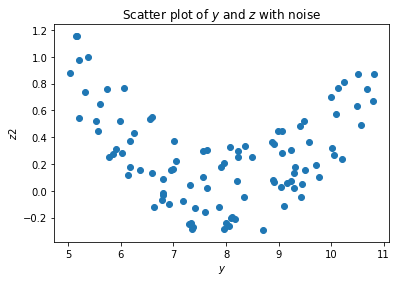

In [9]:
df['z2'] = df['z'] + np.random.uniform(-0.35,0.35,size=n_observations)

plt.scatter(df['y'],df['z2'])
plt.ylabel('$z2$')
plt.xlabel('$y$')
plt.title("Scatter plot of $y$ and $z$ with noise")
plt.show()

##### Explaination
***
I use ***df['z2'] = df['z'] + np.random.uniform(0,0.50,size=n_observations)*** to add a new column to df which consist of the *z* column plus a random distribution to add some noise. After some trail and error, I decided to go with a random distrubtion between -0.35 and 0.35 because I believe the shape can still be recognizedd this way, but not perfectly. To plot a new scatterplot I used exactly the same method as described in f)
***

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.